In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('talk')
import patsy
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [8]:
degrees_that_pay_back = pd.read_csv('degrees-that-pay-back.csv')
salaries_by_college_type = pd.read_csv('salaries-by-college-type.csv')
salaries_by_region = pd.read_csv ('salaries-by-region.csv')

In [9]:
df_merge = pd.merge(salaries_by_college_type,salaries_by_region, on = 'School Name',how = 'left')

In [10]:
df_merge.drop(['Starting Median Salary_y','Mid-Career Median Salary_y','Mid-Career 10th Percentile Salary_y',
        'Mid-Career 25th Percentile Salary_y','Mid-Career 75th Percentile Salary_y',
        'Mid-Career 90th Percentile Salary_y'],axis = 1,inplace = True) 

In [11]:
df_merge.columns = ['School_Name','School_Type','Starting_Median_Salary','Mid_Career_Median_Salary',
             'Mid_Career_10th_Percentile_Salary','Mid_Career_25th_Percentile_Salary',
             'Mid_Career_75th_Percentile_Salary','Mid_Career_90th_Percentile_Salary','Region']

df_merge.drop(['Mid_Career_10th_Percentile_Salary','Mid_Career_90th_Percentile_Salary'],axis = 1, inplace = True)

df_merge['Starting_Median_Salary']= df_merge['Starting_Median_Salary'].str.replace('$','')
df_merge['Starting_Median_Salary']= df_merge['Starting_Median_Salary'].str.replace(',','')
df_merge['Starting_Median_Salary']= df_merge['Starting_Median_Salary'].replace('.00','')
df_merge['Starting_Median_Salary'] = df_merge['Starting_Median_Salary'].astype(float)

df_merge['Mid_Career_Median_Salary']= df_merge['Mid_Career_Median_Salary'].str.replace('$','')
df_merge['Mid_Career_Median_Salary']= df_merge['Mid_Career_Median_Salary'].str.replace(',','')
df_merge['Mid_Career_Median_Salary']= df_merge['Mid_Career_Median_Salary'].replace('.00','')
df_merge['Mid_Career_Median_Salary'] = df_merge['Mid_Career_Median_Salary'].astype(float)

df_merge['Mid_Career_25th_Percentile_Salary'] = df_merge['Mid_Career_25th_Percentile_Salary'].str.replace('$','')
df_merge['Mid_Career_25th_Percentile_Salary'] = df_merge['Mid_Career_25th_Percentile_Salary'].str.replace(',','')
df_merge['Mid_Career_25th_Percentile_Salary'] = df_merge['Mid_Career_25th_Percentile_Salary'].replace('.00','')
df_merge['Mid_Career_25th_Percentile_Salary'] = df_merge['Mid_Career_25th_Percentile_Salary'].astype(float)

df_merge['Mid_Career_75th_Percentile_Salary'] = df_merge['Mid_Career_75th_Percentile_Salary'].str.replace('$','')
df_merge['Mid_Career_75th_Percentile_Salary'] = df_merge['Mid_Career_75th_Percentile_Salary'].str.replace(',','')
df_merge['Mid_Career_75th_Percentile_Salary'] = df_merge['Mid_Career_75th_Percentile_Salary'].replace('.00','')
df_merge['Mid_Career_75th_Percentile_Salary'] = df_merge['Mid_Career_75th_Percentile_Salary'].astype(float)

In [12]:
df_merge.head(5)

,School_Name,School_Type,Starting_Median_Salary,Mid_Career_Median_Salary,Mid_Career_25th_Percentile_Salary,Mid_Career_75th_Percentile_Salary,Region
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,99200.0,168000.0,Northeastern
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,104000.0,161000.0,California
2,Harvey Mudd College,Engineering,71800.0,122000.0,96000.0,180000.0,California
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,94300.0,143000.0,Northeastern
4,Cooper Union,Engineering,62200.0,114000.0,80200.0,142000.0,Northeastern


In [34]:
df_merge['percent_growth'] = (df_merge['Mid_Career_Median_Salary'] - df_merge['Starting_Median_Salary']) / df_merge['Starting_Median_Salary']
df_merge.loc[df_merge['School_Type']=="Engineering"].mean()
df_merge.loc[df_merge['School_Type']=="Party"].mean()
df_merge.loc[df_merge['School_Type']=="Liberal Arts"].mean()
df_merge.loc[df_merge['School_Type']=="Ivy League"].mean()
df_merge.loc[df_merge['School_Type']=="State"].mean()

Starting_Median_Salary                44126.285714
Mid_Career_Median_Salary              78567.428571
Mid_Career_25th_Percentile_Salary     56689.714286
Mid_Career_75th_Percentile_Salary    106970.857143
percent_growth                            0.777584
value_growth                          34441.142857
dtype: float64

In [16]:
percent_growth = {'1':["Engineering",0.759268*100],'2':["Party",0.85388*100],
          '3':["Liberal Arts", 0.949769*100],'4':["Ivy",0.987949*100],
          '5':["State",0.777584*100]}
Percent_growth = pd.DataFrame.from_dict(percent_growth,orient = 'index',columns=['School_Type','Avg_percent_growth'])

In [17]:
Percent_growth

,School_Type,Avg_percent_growth
1,Engineering,75.9268
2,Party,85.3880
3,Liberal Arts,94.9769
4,Ivy,98.7949
5,State,77.7584


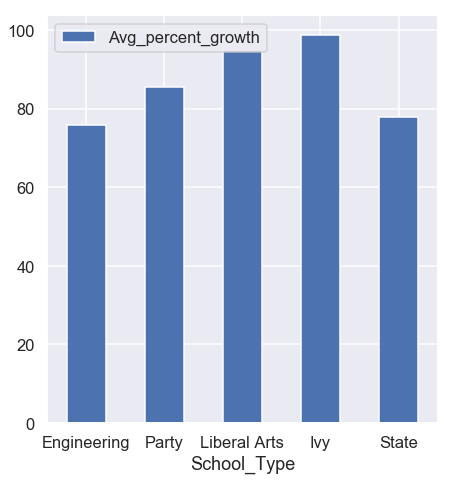

In [18]:
Percent_growth.plot.bar(x = 'School_Type',figsize = (7,7.5),rot = 0)

In [20]:
df_merge['value_growth'] = df_merge['Mid_Career_Median_Salary'] - df_merge['Starting_Median_Salary']
df_merge.loc[df_merge['Region']=="Northeastern"].mean()
df_merge.loc[df_merge['Region']=="California"].mean()
df_merge.loc[df_merge['Region']=="Southern"].mean()
df_merge.loc[df_merge['Region']=="Western"].mean()
df_merge.loc[df_merge['Region']=="Midwestern"].mean()

Starting_Median_Salary                43801.562500
Mid_Career_Median_Salary              77637.500000
Mid_Career_25th_Percentile_Salary     56301.562500
Mid_Career_75th_Percentile_Salary    106775.000000
percent_growth                            0.770151
value_growth                          33835.937500
dtype: float64

In [21]:
value_growth = {'1':["Northeastern",44251.428571],'2':["California",41477.777778],
          '3':["Southern",36014.705882],'4':["Western",33984.615385],
          '5':["Midwestern",33835.937500]}
Value_growth = pd.DataFrame.from_dict(value_growth,orient = 'index',columns=['Region','Avg_value_growth'])

In [22]:
Value_growth

,Region,Avg_value_growth
1,Northeastern,44251.428571
2,California,41477.777778
3,Southern,36014.705882
4,Western,33984.615385
5,Midwestern,33835.937500


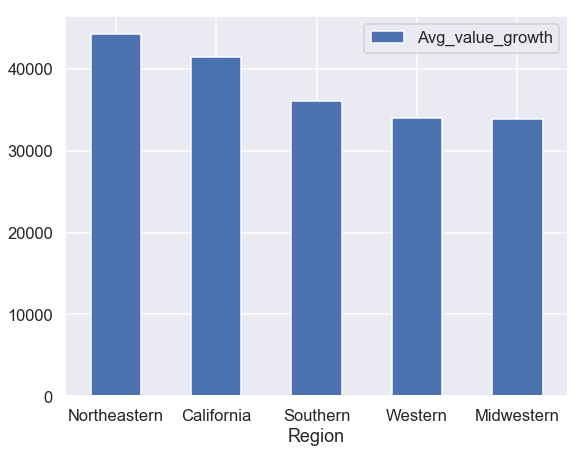

In [23]:
Value_growth.plot.bar(x = 'Region',figsize = (9,7),rot = 0)

In [24]:
print(df_merge.loc[df_merge['School_Type']=="Engineering"].mean())
print(df_merge.loc[df_merge['School_Type']=="Party"].mean())
print(df_merge.loc[df_merge['School_Type']=="Liberal Arts"].mean())
print(df_merge.loc[df_merge['School_Type']=="Ivy League"].mean())
print(df_merge.loc[df_merge['School_Type']=="State"].mean())

Starting_Median_Salary                59057.894737
Mid_Career_Median_Salary             103842.105263
Mid_Career_25th_Percentile_Salary     81384.210526
Mid_Career_75th_Percentile_Salary    134868.421053
percent_growth                            0.759268
value_growth                          44784.210526
dtype: float64
Starting_Median_Salary                45715.00000
Mid_Career_Median_Salary              84685.00000
Mid_Career_25th_Percentile_Salary     60005.00000
Mid_Career_75th_Percentile_Salary    118100.00000
percent_growth                            0.85388
value_growth                          38970.00000
dtype: float64
Starting_Median_Salary                45746.808511
Mid_Career_Median_Salary              89378.723404
Mid_Career_25th_Percentile_Salary     61936.170213
Mid_Career_75th_Percentile_Salary    131076.595745
percent_growth                            0.949769
value_growth                          43631.914894
dtype: float64
Starting_Median_Salary                60475

In [25]:
salary = {'1':["Engineering",59057.894737,103842.105263],'2':["Party",45715.0,84685.0],
          '3':["Liberal Arts",45746.808511,89378.723404],'4':["Ivy",60475.0,120125.0],
          '5':["State",44126.285714,78567.428571]}
Salary = pd.DataFrame.from_dict(salary,orient = 'index',columns=['School_Type','Avg_starting_median',
                                                                 'Avg_mid_career_median'])

In [26]:
Salary

,School_Type,Avg_starting_median,Avg_mid_career_median
1,Engineering,59057.894737,103842.105263
2,Party,45715.000000,84685.000000
3,Liberal Arts,45746.808511,89378.723404
4,Ivy,60475.000000,120125.000000
5,State,44126.285714,78567.428571


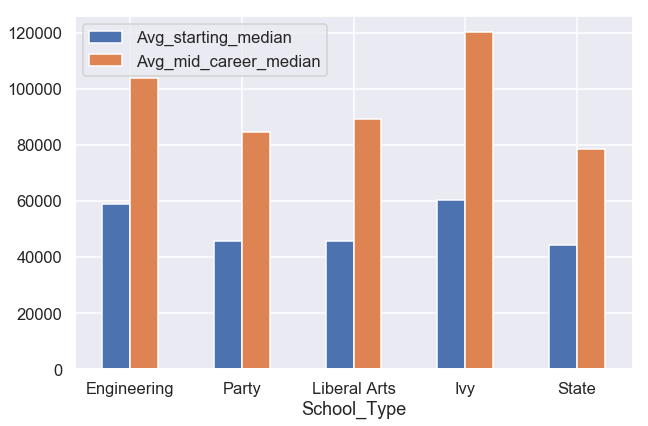

In [27]:
Salary.plot.bar(x = 'School_Type',figsize = (10,6.5),rot = 0)

In [28]:
mod = ols('Mid_Career_Median_Salary ~ School_Type',data=df_merge).fit()
anova_table = sm.stats.anova_lm(mod,type=2)
print(anova_table)

                df        sum_sq       mean_sq          F        PR(>F)
School_Type    4.0  2.445324e+10  6.113310e+09  52.694356  1.349855e-32
Residual     264.0  3.062783e+10  1.160145e+08        NaN           NaN


In [29]:
df_merge.loc[df_merge['Region']=="Northeastern"].mean()
df_merge.loc[df_merge['Region']=="California"].mean()
df_merge.loc[df_merge['Region']=="Southern"].mean()
df_merge.loc[df_merge['Region']=="Western"].mean()
df_merge.loc[df_merge['Region']=="Midwestern"].mean()

Starting_Median_Salary                43801.562500
Mid_Career_Median_Salary              77637.500000
Mid_Career_25th_Percentile_Salary     56301.562500
Mid_Career_75th_Percentile_Salary    106775.000000
percent_growth                            0.770151
value_growth                          33835.937500
dtype: float64

In [30]:
region = {'1':["Northeastern",49267.142857,93518.571429],'2':["California",50155.555556,91633.333333],
         '3':["Southern", 44288.235294,80302.941176],'4':["Western",44151.282051,78135.897436],
         '5':["Midwestern",43801.5625,77637.5000]}
Region = pd.DataFrame.from_dict(region,orient = 'index',columns=['Region','Avg_starting_median',
                                                                 'Avg_mid_career_median'])

In [31]:
Region

,Region,Avg_starting_median,Avg_mid_career_median
1,Northeastern,49267.142857,93518.571429
2,California,50155.555556,91633.333333
3,Southern,44288.235294,80302.941176
4,Western,44151.282051,78135.897436
5,Midwestern,43801.562500,77637.500000


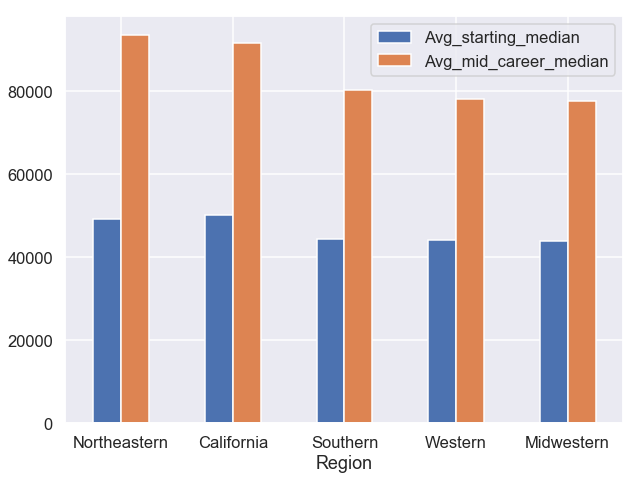

In [32]:
Region.plot.bar(x = 'Region',figsize = (10,7.5),rot = 0)

In [33]:
mod = ols('Starting_Median_Salary ~ Region',data=df_merge).fit()
anova_table = sm.stats.anova_lm(mod,type=2)
print(anova_table)

             df        sum_sq       mean_sq         F        PR(>F)
Region      4.0  1.854800e+09  4.637001e+08  13.36962  6.234456e-10
Residual  263.0  9.121659e+09  3.468311e+07       NaN           NaN
